In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
data1 = np.genfromtxt("paper test1.csv", delimiter=",")
data2 = np.genfromtxt("paper test2.csv", delimiter=",")

Using TensorFlow backend.


In [2]:
data_u1 = data1[:, :1]
data_y1 = data1[:, 1:]
data_train = np.c_[data_y1[:32283], data_u1[1:]]
data_u2 = data2[:, :1]
data_y2 = data2[:, 1:]
data_val = np.c_[data_y2[:39051], data_u2[1:]]

In [3]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        xset = dataset[i:(i+look_back)]
        dataY.append(dataset[i + look_back, 0])      
        dataX.append(xset)
    return np.array(dataX), np.array(dataY)

In [4]:
trainX, trainY = create_dataset(data_train, 1)
valX, valY = create_dataset(data_val, 1)

In [5]:
from keras import initializers
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(1, 2)))
model.add(Dense(1))   
model.compile(loss="mean_squared_error", optimizer="adam")

In [6]:
history = model.fit(trainX, trainY, epochs=100, batch_size=128, validation_data=(valX, valY))

Train on 32281 samples, validate on 39049 samples
Epoch 1/100
32281/32281 [==============================] - 1s 31us/step - loss: 1622367.3202 - val_loss: 3524.5968
Epoch 2/100
32281/32281 [==============================] - 1s 23us/step - loss: 196.1412 - val_loss: 4.2940
Epoch 3/100
32281/32281 [==============================] - 1s 23us/step - loss: 3.3022 - val_loss: 4.2908
Epoch 4/100
32281/32281 [==============================] - 1s 23us/step - loss: 3.2974 - val_loss: 4.2797
Epoch 5/100
32281/32281 [==============================] - 1s 23us/step - loss: 3.2908 - val_loss: 4.2789
Epoch 6/100
32281/32281 [==============================] - 1s 23us/step - loss: 3.2825 - val_loss: 4.2591
Epoch 7/100
32281/32281 [==============================] - 1s 23us/step - loss: 3.2739 - val_loss: 4.2465
Epoch 8/100
32281/32281 [==============================] - 1s 23us/step - loss: 3.2621 - val_loss: 4.2327
Epoch 9/100
32281/32281 [==============================] - 1s 23us/step - loss: 3.2508 - va

32281/32281 [==============================] - 1s 23us/step - loss: 0.5925 - val_loss: 0.3875
Epoch 78/100
32281/32281 [==============================] - 1s 22us/step - loss: 0.5645 - val_loss: 0.4020
Epoch 79/100
32281/32281 [==============================] - 1s 22us/step - loss: 0.6759 - val_loss: 0.4128
Epoch 80/100
32281/32281 [==============================] - 1s 22us/step - loss: 0.5875 - val_loss: 0.8431
Epoch 81/100
32281/32281 [==============================] - 1s 22us/step - loss: 0.6124 - val_loss: 1.0098
Epoch 82/100
32281/32281 [==============================] - 1s 22us/step - loss: 0.6005 - val_loss: 1.1861
Epoch 83/100
32281/32281 [==============================] - 1s 22us/step - loss: 0.5855 - val_loss: 1.6498
Epoch 84/100
32281/32281 [==============================] - 1s 22us/step - loss: 0.6738 - val_loss: 0.4886
Epoch 85/100
32281/32281 [==============================] - 1s 23us/step - loss: 0.6350 - val_loss: 0.8583
Epoch 86/100
32281/32281 [========================

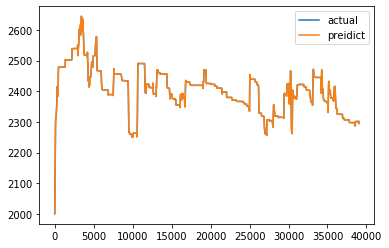

In [7]:
Predict = model.predict(valX)
Y1 = valY
Y2 = Predict
y1 = Y1
y2 = list(Y2[ : ,0])
plt.plot(y1, label='actual')
plt.plot(y2, label='preidict')
plt.legend()
plt.show()

In [8]:
valXX = valX[: ,: ,1]

In [9]:
a = []
x = 2000.386649
for i in range(32281):
    n1 = np.append(x, valXX[i])
    n2 = np.reshape(n1, (1,1,n1.shape[0]))
    n3 = model.predict(n2)
    n4 = n3[:,0][0]
    x = n4
    a.append(n4)

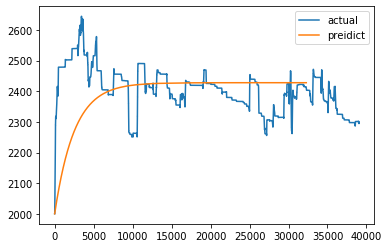

In [11]:
plt.plot(valY, label='actual')
plt.plot(a, label='preidict')
plt.legend()
plt.show()